# Python Assignment
## Name: Jahanara Akter Sonia

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

# Task 1

Here Dr.X used Def command to define this function (get_sequence_from_file), and to extract sequences from one file using a list from another file. Next he created a loop and used the parse command to create a record of the sequences in the following steps sequence_data_dict = {} - To create a tuple for the new sequences extracted and use {} to create a dictionary record.description.split to create a record of each sequence a store in the vraiable called description. I gathered this idea from: https://www.geeksforgeeks.org/python-def-keyword/ and https://biopython.org/docs/1.75/api/Bio.SeqIO.html


In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [3]:
f = open('penguins_cytb.fasta', 'r')

data = get_sequences_from_file(f)

print(data)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

# Task 2
## The string Translate Function- to translate aminoacid from nucleotides


 Here the Argument is string_nucleotides. I created a loop to that reads where the codons starting from nuclotide 0 to the 3rd, to take every three nuclotide as a codon. Also, the loop should stop if it finds a stop codon. 
 Return: aa_seq_string  
 The Output is amino acid translated list - I followed the following tutorial and information to translate amino acid from nucleotides-  https://www.geeksforgeeks.org/dna-protein-python-3/ and http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

In [4]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
    
    aa = ""
    aa_seq_string = ""
    
    for i in range(0,len(string_nucleotides),3): 
        codon = string_nucleotides[i:i+3] 
        if codon not in mito_table.stop_codons: 
            aa = mito_table.forward_table[codon] 
            aa_seq_string += aa 
        else: 
            return(aa_seq_string)
        
    return(aa_seq_string)

In [5]:
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

amino_acid = {}

for k, v in data.items():
    amino_acid[k] = translate_function(v)

print(amino_acid)
    

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

# Task 3 
## My Alternative Function to Translate into amino acid

Here I used my own funtion where the function is defined as translate_dna_1 and translated nucleotides into amino acids, excluding stop codon. Here I used nucleotide sequence of Spheniscus_humboldti_seq to translate into amino acid sequence. Here I followed bioPython library utilities and learned the idea from https://biopython.org/wiki/ProtParam and https://biopython-tutorial.readthedocs.io/en/latest/notebooks/03%20-%20Sequence%20Objects.html

In this case, as the two different translation function I used give same output that means my own function worked correctly. 

In [6]:
from Bio.Seq import Seq
def translate_dna_1(dna_sequence):
    penguin_seq = Seq(dna_sequence)
    aa_seq = penguin_seq.translate(table = 2, to_stop = True)
    return aa_seq

In [7]:
Spheniscus_humboldti_seq = data['Spheniscus humboldti']
translate_dna_1(str(Spheniscus_humboldti_seq))

Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLSICLATQILTGLLLAA...LNH')

In [8]:
translate_dna_1(str(Spheniscus_humboldti_seq)) == str(amino_acid['Spheniscus humboldti'])

True

# Task 4
## Counting Molecular Weight- An amino acid analysis function

  In this task, to count amino acid I have used molecular weight and protein analysis function.
    Here, I defined the function as compute_molecular_weight and the argument is aa_seq
    The output is the molecular weight of the amino acid in this file(Spheniscus_humboldti_seq). I learned molecular weight funtion analysis from https://biopython.org/docs/1.75/api/Bio.Seq.html and https://biopython.org/wiki/ProtParam. By this function I can analyse molecular weight of other amino acid sequence also.



In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import molecular_weight
def compute_molecular_weight(aa_seq): 
    analysis_seq = ProteinAnalysis(aa_seq)
    weight = analysis_seq.molecular_weight()
    return(weight)

In [10]:
compute_molecular_weight(str(translate_dna_1(str(Spheniscus_humboldti_seq))))

42399.55200000001

# Task 5
## GC Content Analysis Funtion


In this task to compute percent G and C nucleotides from nucleotide sequence, I defined the function as gc_content and the arguement is dna_sequence. Here to count gc_percent, at first, I counted all the items that are not the DNA nucleotides to name the object as bases_na and later removed bases_na from dna_sequence length.
The object returned is the gc_cont and output is gc percent.


In [11]:
def gc_content(dna_sequence):
    bases_na = dna_sequence.count('n') + dna_sequence.count('N') 
    gc_cont = float(dna_sequence.count('C') + dna_sequence.count('G')) * 100.0 / (len(dna_sequence) - bases_na) 
    return gc_cont

gc_content(Spheniscus_humboldti_seq)

49.25634295713036

# Main

In [12]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [13]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


# Task 6
## Adding Columns to Penguine Dataframe
 Added two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content and the value 'NaN' indicates that these cells are currently empty.


In [14]:
penguins_df["molecular weight"] = "NaN" 
penguins_df["GC content"] = "NaN" 
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# Task 7
## Adding Molecular Weight and GC Content to Penguine Dataframe

for-loop is used that translates each sequence and also gets molecular weight and computes the GC content
of each translated sequence and adds those data to DataFrame.

In [15]:
row = 0
for key, value in data.items():
    trans_all = translate_dna_1(str(value))
    molecular_weight = compute_molecular_weight(str(trans_all))
    GC_content = gc_content(str(value))
    penguins_df.at[row, 'GC content'] = GC_content 
    penguins_df.at[row, 'molecular weight'] = molecular_weight
    row +=1 

print(penguins_df)

                    species   mass molecular weight GC content
0      Aptenodytes forsteri  28.00       42459.6021  48.381452
1   Aptenodytes patagonicus  13.40       42563.7067  49.693788
2       Eudyptes chrysocome   2.80       42475.5753  51.181102
3     Eudyptes chrysolophus   4.50       42445.5493  50.918635
4         Eudyptes sclateri   4.25       42475.5753  50.831146
5           Eudyptula minor   1.60       42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.614  49.081365
7     Pygoscelis antarctica   4.10       42404.5423  47.769029
8          Pygoscelis papua   6.10       42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.549  48.293963
10     Spheniscus humboldti   4.75        42399.552  49.256343
11  Spheniscus magellanicus   3.40       42459.6021  48.206474


# Task 8
## Bar-chart of the mass with the x-axes labeled with species names

After creating the plot it shows the smallest penguin species - Eudyptula minor

And the geographical range of this species - Eudyptula minor is found on the coastlines of southern Australia and New Zealand.

[Text(0, 0, 'Aptenodytes forsteri'),
 Text(1, 0, 'Aptenodytes patagonicus'),
 Text(2, 0, 'Eudyptes chrysocome'),
 Text(3, 0, 'Eudyptes chrysolophus'),
 Text(4, 0, 'Eudyptes sclateri'),
 Text(5, 0, 'Eudyptula minor'),
 Text(6, 0, 'Pygoscelis adeliae'),
 Text(7, 0, 'Pygoscelis antarctica'),
 Text(8, 0, 'Pygoscelis papua'),
 Text(9, 0, 'Spheniscus demersus'),
 Text(10, 0, 'Spheniscus humboldti'),
 Text(11, 0, 'Spheniscus magellanicus')]

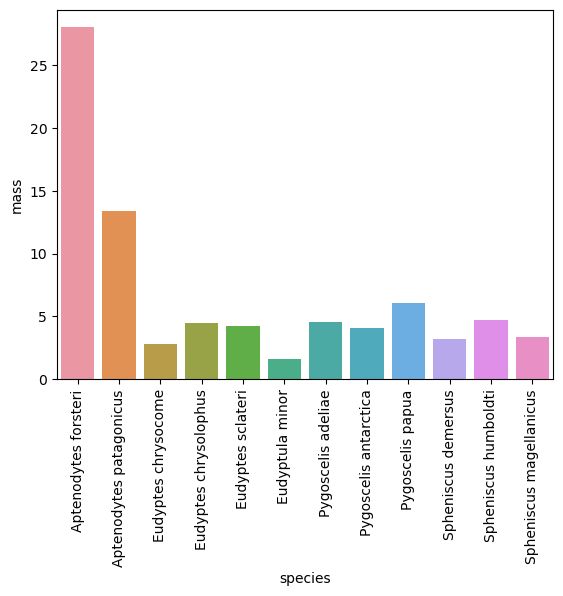

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

bar_chart = sns.barplot(x="species", y="mass",data=penguins_df,) 
bar_chart.set_xticklabels(labels = penguins_df.species, rotation= 90)

# Task 9
## Visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)

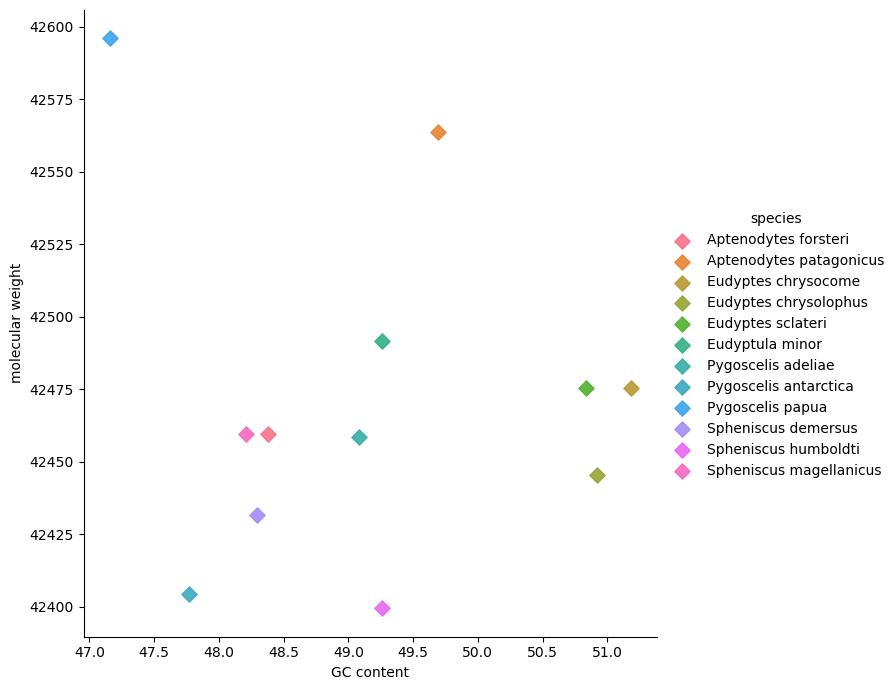

In [17]:
sns.lmplot(x="GC content", y="molecular weight", data=penguins_df, fit_reg=False, height=7, aspect=1, scatter_kws={'alpha':0.9,"s": 60}, 
           hue='species', markers='D')

# Task 10
## New Dataframe created to a file called "penguins_mass_cytb.csv"

In [18]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)
penguins = pd.read_csv("penguins_mass_cytb.csv")
penguins

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


# Task 11
## Own Functions
1. Plotted a graph for visualization of GC content (Y axis) as a function of mass (X axis)
2. Then plotted another bar chart to visualize mass and GC contens of all the species.

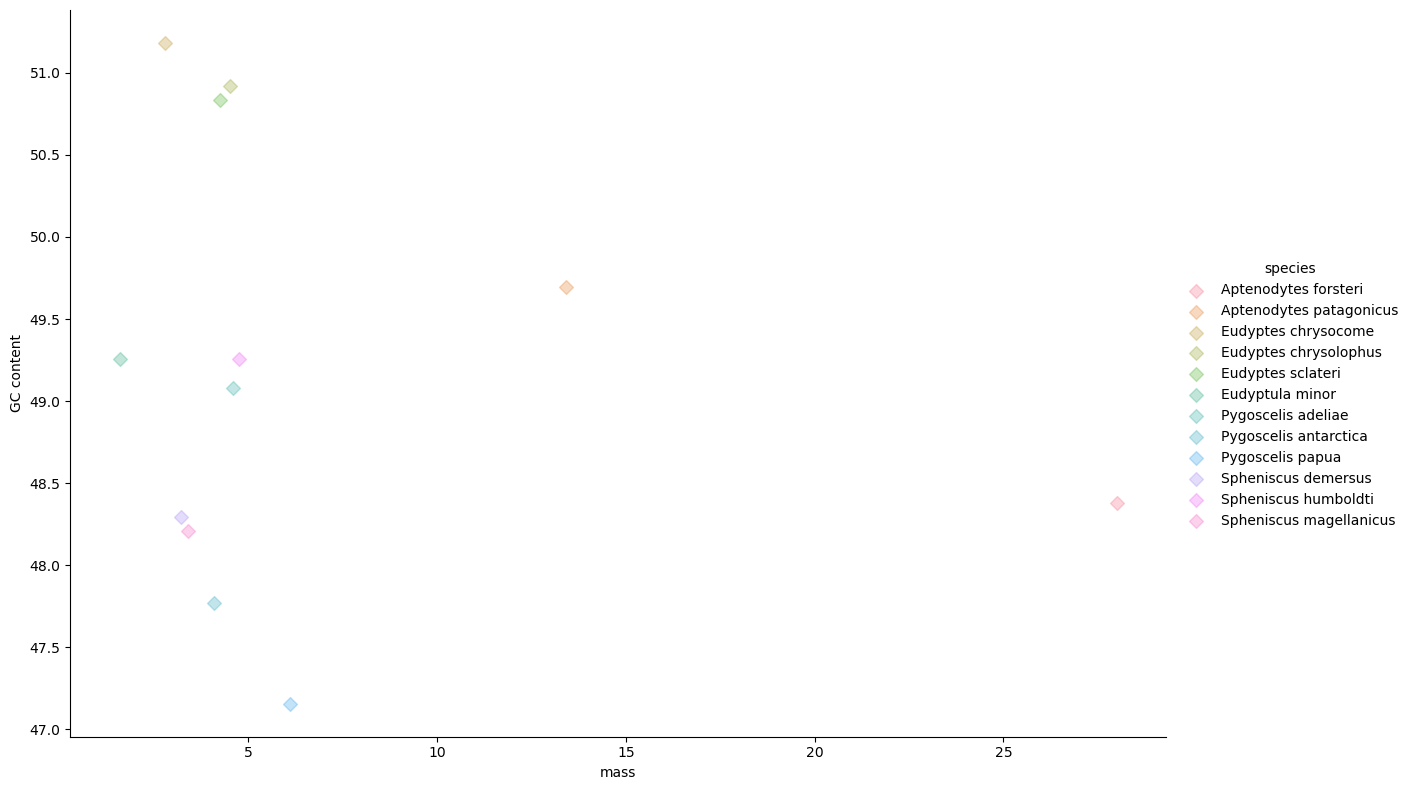

In [19]:
sns.lmplot(x="mass", y="GC content", data=penguins_df, 
           fit_reg=False, height=8, aspect=1.5, scatter_kws={'alpha':0.3,"s": 50}, 
           hue='species', markers='D')

<Axes: xlabel='species'>

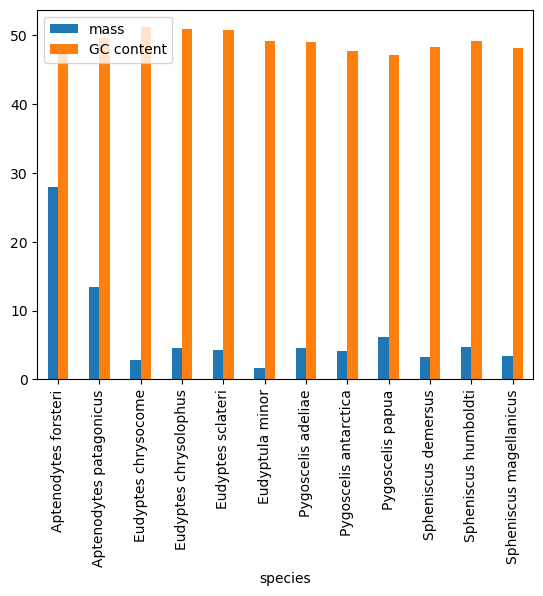

In [20]:
penguins_df.plot(x='species', y = ['mass', 'GC content'], kind = 'bar' )